In [1]:
# 导入相应的包
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
from scipy import stats
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

## B数据集的分析

In [2]:
B_data=pd.read_csv("../../dataSet/B_data_time.csv")
B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20


In [3]:
#用户名与机器名单一数据，没有意义的
B_data.value_counts("USER LOTINFO")
B_data.value_counts("MACHINE")

MACHINE
KOHYOUNG    6557880
dtype: int64

In [4]:
B_data.value_counts("DATE")

DATE
2021/8/27    2569980
2021/8/24    2084680
2021/8/10    1903220
dtype: int64

In [5]:
# B产品只有Btop工作流程
B_data.value_counts("JOB")

JOB
GT30-V2.8-00-BOT-10    6557880
dtype: int64

In [6]:
B_data["BARCODE_INDEX"].nunique()

1554

In [7]:
B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20


In [9]:
B_data.value_counts("S_TIME")

S_TIME
10:00:16    12660
11:30:15     8440
10:47:29     8440
10:28:06     8440
10:17:13     8440
            ...  
10:08:00     4220
10:07:50     4220
10:07:45     4220
10:07:23     4220
15:38:53     4220
Length: 1525, dtype: int64

In [10]:
B_data.value_counts("BARCODE_INDEX")

BARCODE_INDEX
13611    4220
43664    4220
43686    4220
43685    4220
43684    4220
         ... 
36928    4220
36927    4220
36926    4220
36925    4220
44197    4220
Length: 1554, dtype: int64

In [11]:
B_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557880 entries, 0 to 6557879
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Component ID   object 
 1   Volume(%)      float64
 2   Height(um)     float64
 3   Area(%)        float64
 4   OffsetX(mm)    float64
 5   OffsetY(mm)    float64
 6   Result         object 
 7   Panel          int64  
 8   DATE           object 
 9   JOBRESULT      object 
 10  USER LOTINFO   object 
 11  MACHINE        object 
 12  SIZE           object 
 13  CYCLE          int64  
 14  JOB            object 
 15  BARCODE_INDEX  int64  
 16  S_TIME         object 
 17  E.TIME         object 
dtypes: float64(5), int64(3), object(10)
memory usage: 900.6+ MB


In [12]:
# 查看时间差与周期|是否有偏差
B_data[abs((pd.to_datetime((B_data["S_TIME"]))-pd.to_datetime((B_data["E.TIME"]))).dt.total_seconds())!=B_data["CYCLE"]]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME


In [21]:
B_data.value_counts("JOBRESULT").index

Index([' GOOD', ' PASS', ' FAIL'], dtype='object', name='JOBRESULT')

In [22]:
B_data.value_counts("CYCLE")

CYCLE
5    5346740
4    1088760
6     101280
7      21100
dtype: int64

In [8]:
# 失败样本情况
B_data[B_data["JOBRESULT"]==" FAIL"].describe()

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Panel,CYCLE,BARCODE_INDEX
count,59080.000000,59080.000000,59080.000000,59080.000000,59080.000000,59080.000000,59080.000000,59080.000000
mean,103.223493,112.061037,98.046441,-0.000976,0.004045,5.500000,5.000000,37702.285714
std,15.628145,9.882132,12.547698,0.008306,0.013316,2.872306,0.755935,10206.110034
min,3.914000,46.771000,8.368000,-0.053000,-0.117000,1.000000,4.000000,13614.000000
25%,94.407000,105.894500,90.584750,-0.006000,-0.005000,3.000000,5.000000,37015.000000
50%,103.891000,112.599000,101.281500,-0.001000,0.002000,5.500000,5.000000,43873.000000
75%,112.913000,118.814000,107.068250,0.005000,0.009000,8.000000,5.000000,43940.000000
max,158.713000,169.244000,147.770000,0.043000,0.095000,10.000000,7.000000,44165.000000


In [9]:
B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20


In [10]:
B_data[B_data["DATE"]=="2021/8/27"].value_counts("JOBRESULT")

JOBRESULT
 GOOD    2021380
 PASS     514840
 FAIL      33760
dtype: int64

**每一个大文件都是一个板子，每一个PCB上面都有不同的元器件，我们需要查看好的PCB上面，与PASS的样本分析状况，还有fail**

In [11]:
## good与pass与fail样本区别
Good_B_data=B_data[B_data["JOBRESULT"]==" GOOD"]
PASS_B_data=B_data[B_data["JOBRESULT"]==" PASS"]
FAIL_B_data=B_data[B_data["JOBRESULT"]==" FAIL"]

In [13]:
Good_B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
25320,1:C2,106.897,106.857,100.038,0.005,0.001,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25321,1:C2,100.792,99.934,100.858,0.000,0.001,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25322,1:C10,108.798,113.731,95.663,-0.005,0.005,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25323,1:C10,110.868,122.733,90.333,0.000,0.004,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25324,1:C11,120.395,117.939,102.082,-0.008,0.012,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22


In [14]:
Good_B_data.describe()

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Panel,CYCLE,BARCODE_INDEX
count,5.663240e+06,5.663240e+06,5.663240e+06,5.663240e+06,5.663240e+06,5.663240e+06,5.663240e+06,5.663240e+06
mean,1.041243e+02,1.110327e+02,9.982590e+01,-1.936988e-03,9.741413e-03,5.500000e+00,4.832340e+00,3.210811e+04
std,1.304550e+01,8.944919e+00,9.581781e+00,8.635776e-03,1.567398e-02,2.872282e+00,3.853468e-01,1.281302e+04
min,3.819900e+01,7.392700e+01,4.112800e+01,-7.200000e-02,-6.300000e-02,1.000000e+00,4.000000e+00,1.361700e+04
25%,9.505600e+01,1.049970e+02,9.325600e+01,-8.000000e-03,-2.000000e-03,3.000000e+00,5.000000e+00,1.396100e+04
50%,1.034090e+02,1.109470e+02,1.020020e+02,-2.000000e-03,6.000000e-03,5.500000e+00,5.000000e+00,3.713550e+04
75%,1.124150e+02,1.168770e+02,1.072540e+02,4.000000e-03,1.800000e-02,8.000000e+00,5.000000e+00,4.376800e+04
max,1.744690e+02,1.733280e+02,1.326360e+02,4.500000e-02,1.080000e-01,1.000000e+01,6.000000e+00,4.419700e+04


In [16]:
Good_B_data["Volume(%)"].mean()

104.1243362317331

In [17]:
Good_B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
25320,1:C2,106.897,106.857,100.038,0.005,0.001,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25321,1:C2,100.792,99.934,100.858,0.000,0.001,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25322,1:C10,108.798,113.731,95.663,-0.005,0.005,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25323,1:C10,110.868,122.733,90.333,0.000,0.004,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22
25324,1:C11,120.395,117.939,102.082,-0.008,0.012,GOOD,1,2021/8/10,GOOD,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,13617,05:56:18,05:56:22


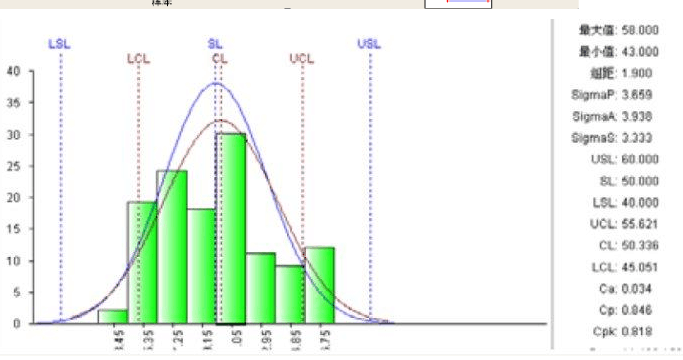

In [93]:
Good_B_data["Volume(%)"].max()

174.469

In [163]:
Good_B_data["Volume(%)"].min()

38.199

In [164]:
# 计算判断异常点和极端异常点的临界值
outlier_ll = Good_B_data["Volume(%)"].mean() - 2* Good_B_data["Volume(%)"].std()
outlier_ul = Good_B_data["Volume(%)"].mean() + 2* Good_B_data["Volume(%)"].std()

In [165]:
outlier_ll

78.03334311133018

In [167]:
outlier_ul

130.215329352136

In [97]:
outlier_ll = Good_B_data["OffsetY(mm)"].mean() - 2* Good_B_data["OffsetY(mm)"].std()
outlier_ul = Good_B_data["OffsetY(mm)"].mean() + 2* Good_B_data["OffsetY(mm)"].std()

<AxesSubplot:xlabel='Volume(%)', ylabel='Density'>

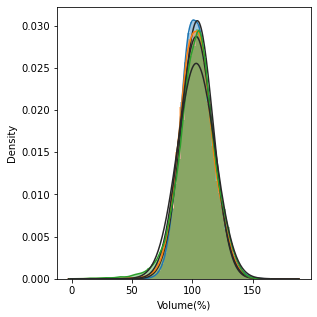

In [21]:
from scipy import stats
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.distplot(Good_B_data['Volume(%)'],fit=stats.norm)
sns.distplot(PASS_B_data['Volume(%)'],fit=stats.norm)
sns.distplot(FAIL_B_data['Volume(%)'],fit=stats.norm)
# Good_B_data["Volume(%)"]

In [117]:
def cpk_calc(df_data: pd.DataFrame, usl, lsl):
    """
    :param df_data: 数据dataframe
    :param usl: 数据指标上限
    :param lsl: 数据指标下限
    :return:
    """
    sigma = 3
    # 若下限为0, 则使用上限反转负值替代
    # 数据平均值
    u = df_data.mean()[0]

    # 数据标准差
    stdev = np.std(df_data.values, ddof=1)
#     # 生成横轴数据平均分布
#     x1 = np.linspace(u - sigma * stdev, u + sigma * stdev, 1000)
#      # 计算正态分布曲线
#     y1 = np.exp(-(x1 - u) ** 2 / (2 * stdev ** 2)) / (math.sqrt(2 * math.pi) * stdev)
    cpu = (usl - u) / (sigma * stdev)
    cpl = (u - lsl) / (sigma * stdev)
    # 得出cpk
    cpk = min(cpu, cpl)
    cp = (lsl - usl)/6/u
    return abs(cpk)
 
#     # 使用matplotlib画图
# #     plt.xlim(x1[0] - 0.5, x1[-1] + 0.5)
#     plt.plot(x1, y1)
#     plt.hist(df_data.values, 15, density=True)
#     plt.title("cpk={0}".format(cpk))
#     plt.show()

In [116]:
CPk_data=pd.DataFrame()

In [79]:
B_data["JOBRESULT"].values[1]

' PASS'

In [118]:
CPk_data=pd.DataFrame()
inx=[]
inx1=[]
Volume=[]
Height= []
Area =[]
OffsetX=[]
OffsetY =[]
for index,values in B_data.groupby("BARCODE_INDEX"):
    inx.append(index)
    inx1.append(data["JOBRESULT"].values[1])
    data=pd.DataFrame(values)
    
    Volume.append(cpk_calc(data[["Volume(%)"]],78,130))
    Height.append(cpk_calc(data[["Height(um)"]],93.14,128.92))
    Area.append(cpk_calc(data[["Area(%)"]],80.66,118.98))
    OffsetX.append(cpk_calc(data[["OffsetX(mm)"]],-0.019,0.015))
    OffsetY.append(cpk_calc(data[["OffsetY(mm)"]],-0.021,0.041))
    
#     CPk_data[index]=cpk_calc(data[["Height(um)"]],78,130)
#     print(data["JOBRESULT"][1])
#     print(data["Volume(%)"]
CPk_data["index"]=inx
CPk_data["result"]=inx1
CPk_data["Volume"]=Volume
CPk_data["Height"]= Height
CPk_data["Area"] =Area
CPk_data["OffsetX"]=OffsetX
CPk_data["OffsetY"]= OffsetY

In [119]:
CPk_data

,index,result,Volume,Height,Area,OffsetX,OffsetY
0,13611,GOOD,0.756524,0.722539,0.694362,0.707968,1.721393
1,13612,PASS,0.847899,0.872805,0.769496,0.655859,0.813202
2,13613,PASS,0.779846,0.973601,0.597897,0.773003,1.553998
3,13614,PASS,0.818277,0.801902,0.712311,0.646677,0.773849
4,13615,FAIL,0.712927,0.697558,0.675210,0.708161,2.038349
...,...,...,...,...,...,...,...
1549,44193,GOOD,0.703915,0.842057,0.638934,0.869488,1.677351
1550,44194,GOOD,0.905291,0.868613,0.908122,0.875761,0.937391
1551,44195,GOOD,0.745770,0.777339,0.700327,0.871771,1.139224
1552,44196,GOOD,0.845843,0.905162,0.902488,0.884156,0.899314


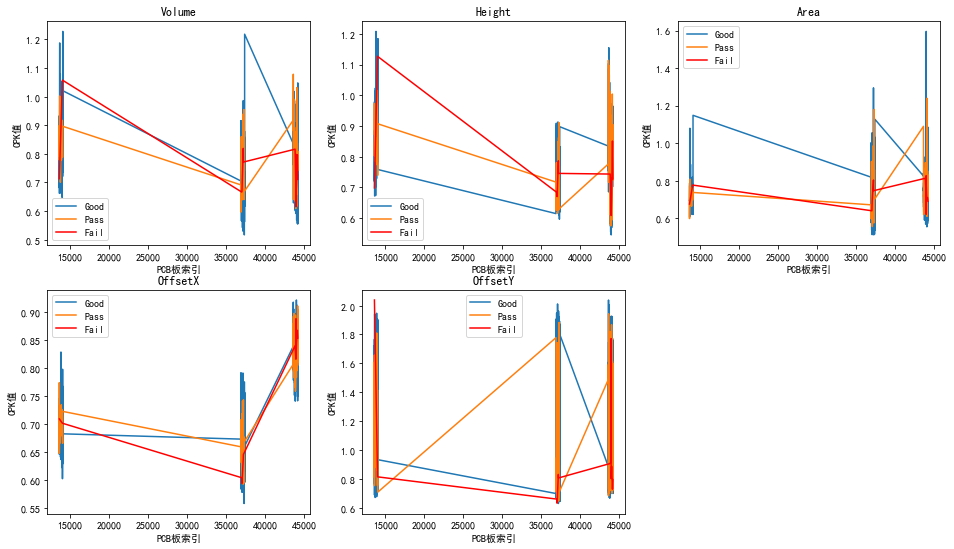

In [139]:

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 直方图与QQ图显示GOOD分布情况
cols=["Volume","Height","Area" , "OffsetX","OffsetY"]
i=0
plt.figure(figsize=(16,14))
for col in  cols:
    i+=1
    ax=plt.subplot(3,3,i)
    plt.plot(CPk_data[CPk_data["result"]==" GOOD"]["index"],CPk_data[CPk_data["result"]==" GOOD"][col])
    plt.plot(CPk_data[CPk_data["result"]==" PASS"]["index"],CPk_data[CPk_data["result"]==" PASS"][col])
    plt.plot(CPk_data[CPk_data["result"]==" FAIL"]["index"],CPk_data[CPk_data["result"]==" FAIL"][col],c="r")
    plt.legend(["Good","Pass",'Fail'])
    plt.xlabel("PCB板索引")
    plt.ylabel("CPK值")
    plt.title(col)
plt.show()

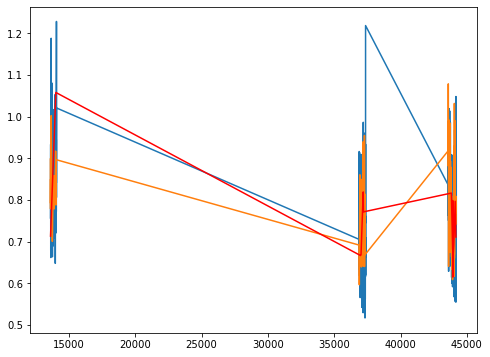

In [129]:
plt.figure(figsize=(8,6))

plt.plot(CPk_data[CPk_data["result"]==" GOOD"]["index"],CPk_data[CPk_data["result"]==" GOOD"]["Volume"])
plt.plot(CPk_data[CPk_data["result"]==" PASS"]["index"],CPk_data[CPk_data["result"]==" PASS"]["Volume"])
plt.plot(CPk_data[CPk_data["result"]==" FAIL"]["index"],CPk_data[CPk_data["result"]==" FAIL"]["Volume"],c="r")

### 计算T样本的CPK值

In [168]:
T_data.describe()

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Panel,CYCLE,BARCODE_INDEX
count,7.423900e+06,7.423900e+06,7.423900e+06,7.423900e+06,7.423900e+06,7423900.0,7.423900e+06,7.423900e+06
mean,1.093872e+02,1.086240e+02,1.032411e+02,2.566385e-03,2.805820e-03,1.0,4.839572e+00,3.337694e+04
std,1.534503e+01,1.271783e+01,7.282145e+00,1.102986e-02,1.377295e-02,0.0,4.399026e-01,1.118514e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.410000e-01,-2.680000e-01,1.0,4.000000e+00,1.406300e+04
25%,9.889800e+01,9.995000e+01,9.973700e+01,-5.000000e-03,-6.000000e-03,1.0,5.000000e+00,3.639900e+04
50%,1.095650e+02,1.086320e+02,1.038850e+02,2.000000e-03,1.000000e-03,1.0,5.000000e+00,3.736350e+04
75%,1.203460e+02,1.173100e+02,1.072820e+02,9.000000e-03,1.000000e-02,1.0,5.000000e+00,3.783100e+04
max,5.298260e+02,2.401540e+02,3.222470e+02,2.880000e-01,3.890000e-01,1.0,7.000000e+00,4.465200e+04


In [169]:
T_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [180]:
# 计算判断异常点和极端异常点的临界值
outlier_ll = Good_T_data["OffsetY(mm)"].mean() - 2* Good_T_data["OffsetY(mm)"].std()
outlier_ul = Good_T_data["OffsetY(mm)"].mean() + 2* Good_T_data["OffsetY(mm)"].std()

In [181]:
print(outlier_ll)
print(outlier_ul)

-0.024871773128919677
0.029781691090983223


In [182]:
CPk_data=pd.DataFrame()
inx=[]
inx1=[]
Volume=[]
Height= []
Area =[]
OffsetX=[]
OffsetY =[]
for index,values in T_data.groupby("BARCODE_INDEX"):
    inx.append(index)
    inx1.append(data["JOBRESULT"].values[1])
    data=pd.DataFrame(values)
    
    Volume.append(cpk_calc(data[["Volume(%)"]],82.80,139.70))
    Height.append(cpk_calc(data[["Height(um)"]],85.84,133.85))
    Area.append(cpk_calc(data[["Area(%)"]],91.10,116.79))
    OffsetX.append(cpk_calc(data[["OffsetX(mm)"]],-0.0195,0.024))
    OffsetY.append(cpk_calc(data[["OffsetY(mm)"]],-0.024,0.029))
    
#     CPk_data[index]=cpk_calc(data[["Height(um)"]],78,130)
#     print(data["JOBRESULT"][1])
#     print(data["Volume(%)"]
CPk_data["index"]=inx
CPk_data["result"]=inx1
CPk_data["Volume"]=Volume
CPk_data["Height"]= Height
CPk_data["Area"] =Area
CPk_data["OffsetX"]=OffsetX
CPk_data["OffsetY"]= OffsetY

In [183]:
CPk_data

,index,result,Volume,Height,Area,OffsetX,OffsetY
0,14063,GOOD,0.772695,0.839560,0.983751,0.718705,0.815350
1,14064,PASS,0.742088,0.809546,0.891586,0.681577,0.976664
2,14065,GOOD,0.790636,0.854083,0.810192,0.698433,0.786509
3,14066,GOOD,0.793098,0.869303,0.786015,0.763289,0.988783
4,14067,GOOD,0.838603,0.851377,0.853548,0.695959,0.849136
...,...,...,...,...,...,...,...
1865,44648,GOOD,0.765942,0.838671,0.810932,0.666929,0.982151
1866,44649,GOOD,0.780156,0.697184,0.856878,0.684304,0.797745
1867,44650,GOOD,0.840955,0.787972,0.979801,0.616523,0.941949
1868,44651,GOOD,0.703931,0.685701,0.705648,0.641165,0.796738


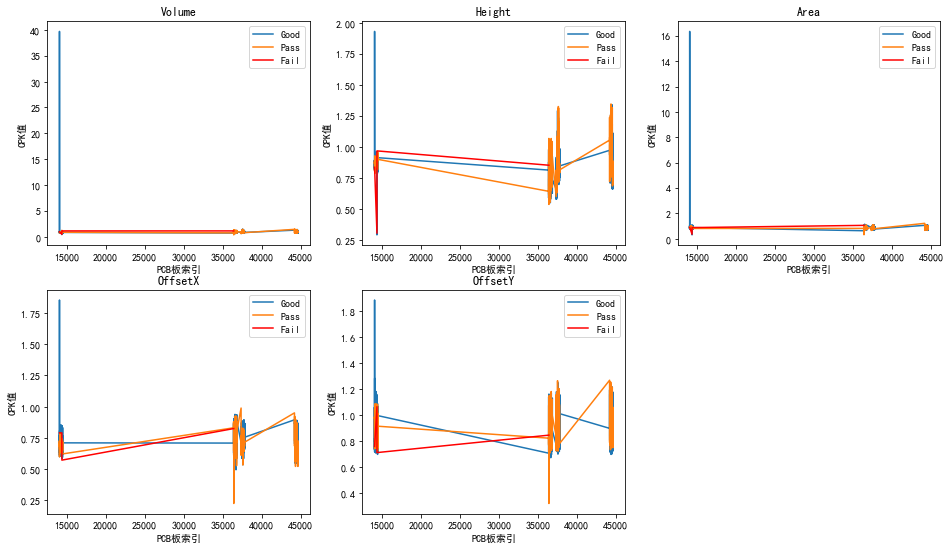

In [184]:
# 直方图与QQ图显示GOOD分布情况
cols=["Volume","Height","Area" , "OffsetX","OffsetY"]
i=0
plt.figure(figsize=(16,14))
for col in  cols:
    i+=1
    ax=plt.subplot(3,3,i)
    plt.plot(CPk_data[CPk_data["result"]==" GOOD"]["index"],CPk_data[CPk_data["result"]==" GOOD"][col])
    plt.plot(CPk_data[CPk_data["result"]==" PASS"]["index"],CPk_data[CPk_data["result"]==" PASS"][col])
    plt.plot(CPk_data[CPk_data["result"]==" FAIL"]["index"],CPk_data[CPk_data["result"]==" FAIL"][col],c="r")
    plt.legend(["Good","Pass",'Fail'])
    plt.xlabel("PCB板索引")
    plt.ylabel("CPK值")
    plt.title(col)
plt.show()

In [156]:
CPk_data

,index,result,Volume,Height,Area,OffsetX,OffsetY
0,14063,GOOD,0.722988,0.631645,1.087344,0.664639,1.079643
1,14064,PASS,0.864989,0.588839,1.267536,0.659811,1.333191
2,14065,GOOD,0.898501,0.658762,1.281658,0.684240,0.939183
3,14066,GOOD,0.911099,0.643323,1.366470,0.624915,1.346679
4,14067,GOOD,0.953181,0.656968,1.349442,0.682492,1.229067
...,...,...,...,...,...,...,...
1865,44648,GOOD,0.889915,0.675406,1.366743,0.652628,1.381101
1866,44649,GOOD,0.899113,0.510249,1.457146,0.669457,0.730758
1867,44650,GOOD,0.960588,0.632692,1.523257,0.603760,1.311551
1868,44651,GOOD,0.820257,0.546456,1.243308,0.626761,0.868241


T样本的xgboost

In [162]:
array([[   1406,     230],
       [    117, 1483027]])

NameError: name 'array' is not defined

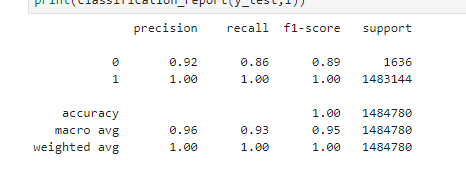

In [159]:
T_data.shape

(7423900, 19)

In [161]:
T_data.value_counts("Result")

Result
GOOD          7415517
E.Insuffi.       7760
E.Exessive        360
E.Position        214
E.Bridging         39
E.AreaL             7
E.Shape             2
E.HeightU           1
dtype: int64

In [155]:
#每次出错后当前点到错误点的平均图，可以是体积，面积，高度等
#颜色是由紫到黄0
def meanLine(attribute):
    B_data0810_mean=[]
    for i in range(len(B_data0810_error)):
        large=B_data0810_error[i][1]
        small=B_data0810_error[i][0]+1
        mean=[]
        if large-small<=1000:
            for i in range(large-small):
                mean.append(B_data0810[attribute].loc[small:small+i].mean())
        else:
            for i in range(1000):
                mean.append(B_data0810[attribute].loc[small:small+i].mean())
        B_data0810_mean.append(mean)

    c=16646359
    for i in range(len(B_data0810_error)):
        large=B_data0810_error[i][1]
        small=B_data0810_error[i][0]
        plt.plot(range(len(B_data0810_mean[i])),B_data0810_mean[i],color='#'+str(dec2hex(c)))
        c+=572
    plt.title(attribute+" mean")

In [140]:
cpk_calc(Good_B_data[["Volume(%)"]],78,130)

0.6675186365700049

In [141]:
cpk_calc(PASS_B_data[["Volume(%)"]],78,130)

0.6429273006511735

In [142]:
cpk_calc(FAIL_B_data[["Volume(%)"]],78,130)

0.5711172059078665

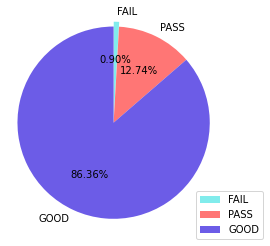

In [29]:
# 样本整体数据检测情况，文件分成人工质检pass，fail ，机器分为good
# [14, 198, 1342]
index=["FAIL","PASS","GOOD"]
sample_jobresult=[len(FAIL_B_data.value_counts("BARCODE_INDEX")),len(PASS_B_data.value_counts("BARCODE_INDEX")),len(Good_B_data.value_counts("BARCODE_INDEX"))]
colors = ['#81ecec','#ff7675','#6c5ce7']
plt.pie(sample_jobresult,labels = index, explode = (0.05, 0, 0),autopct="%1.2f%%", colors = colors, startangle = 90, counterclock = False )
plt.axis('square')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.2))
plt.show()

In [14]:
# 在b样本中机器质检时候全部小的原件都处在与GOOd
Good_B_data.value_counts("Result")

Result
GOOD    5663240
dtype: int64

In [17]:
PASS_B_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524115,1:VT3,115.176,109.836,104.861,-0.006,0.003,GOOD,10,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28
6524116,1:VT3,128.796,125.311,102.781,0.010,0.006,GOOD,10,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28
6524117,1:VT4,128.422,130.932,98.083,0.002,0.011,GOOD,10,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28
6524118,1:VT4,90.446,87.492,103.376,-0.008,0.011,GOOD,10,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28


In [71]:
PASS_B_data.value_counts("Result")

Result
GOOD          834538
E.Insuffi.       993
E.Position        21
E.HeightU          3
E.Bridging         2
E.AreaL            1
E.Exessive         1
E.Shape            1
dtype: int64

In [19]:
1022/834538

0.0012246296753413266

In [20]:
(373+6)/58701

0.006456448782814603

In [16]:
FAIL_B_data.value_counts("Result")

Result
GOOD          58701
E.Insuffi.      373
E.Bridging        6
dtype: int64

In [31]:
# 对比整体样本缺少一个7秒的 周期
Good_B_data.value_counts("CYCLE")

CYCLE
5    4663100
4     974820
6      25320
dtype: int64

In [32]:
Good_B_data.value_counts("DATE")

DATE
2021/8/27    2021380
2021/8/24    1835700
2021/8/10    1806160
dtype: int64

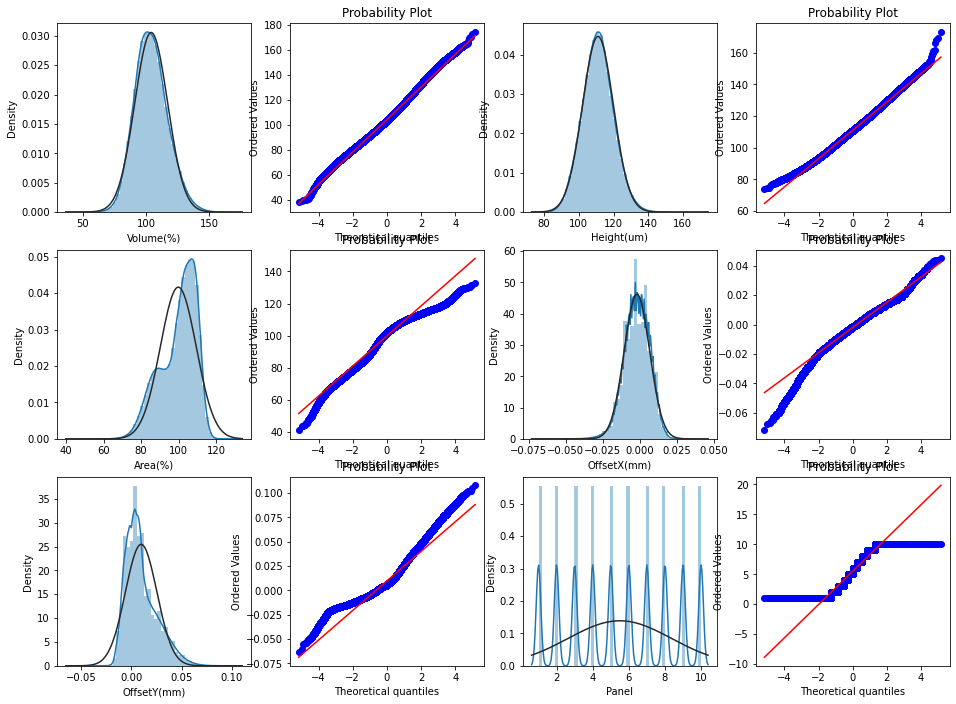

In [22]:
# 直方图与QQ图显示GOOD分布情况
cols=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)" ,"Panel"]
i=0
plt.figure(figsize=(16,16))
for col in  cols:
    i+=1
    ax=plt.subplot(4,4,i)
    sns.distplot(Good_B_data[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(4,4,i)
    res=stats.probplot(Good_B_data[col],plot=plt)
plt.show()

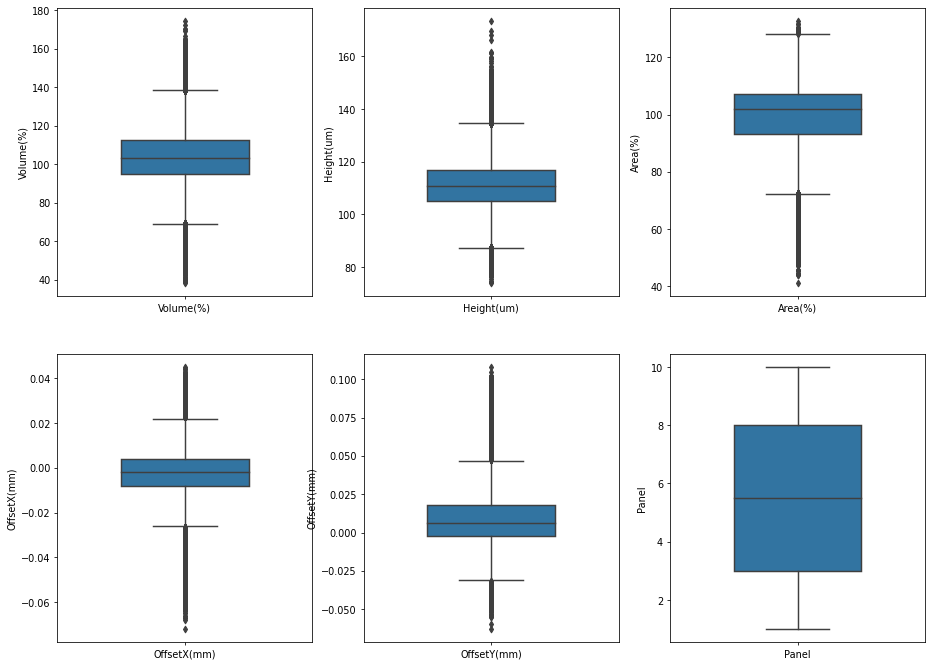

In [23]:
# 箱式图查看是否有异常值
fig=plt.figure(figsize=(16,12),dpi=70)
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=Good_B_data[[cols[i]]],orient="v",width=0.5) 
    plt.ylabel(cols[i])
plt.show()

<AxesSubplot:>

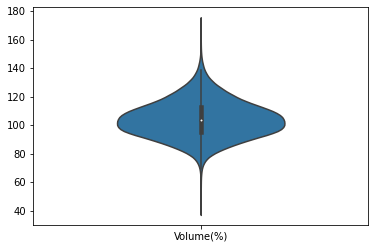

In [24]:
sns.violinplot(data=Good_B_data[["Volume(%)"]],orient="v",width=0.5) 

In [33]:
# 查看PASS样本情况
PASS_B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20


In [34]:
PASS_B_data.value_counts("Result")

Result
GOOD          834538
E.Insuffi.       993
E.Position        21
E.HeightU          3
E.Bridging         2
E.AreaL            1
E.Exessive         1
E.Shape            1
dtype: int64

在这里的result结果中包含着：
*  E.Excessive 多锡
*  E.Areal    面积超出阈值（金手指？）
* E.Shape  外形不良 锡膏的形状不同于正确形状（拉尖）
*  E.HeigthU  高度超出阈值，锡膏累计高度超过或低于公差值
* E.Bridging     桥接
* E.Position  偏移，锡膏位置不同于初始位置
*  E.Insuffi.  少锡  

了解几种情况判定的标准

In [35]:
PASS_B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20


In [37]:
#单个失败的元器件在整个PCB上的比率而产生PASS结果
def error_rate(paras):
    if paras==" GOOD":
        return 1
    else:
        return 0
PASS_B_data.groupby("BARCODE_INDEX")["Result"]
# ["BARCODE_INDEX"]

In [38]:
# [14, 198, 1342]
pd.DataFrame(PASS_B_data.groupby(["BARCODE_INDEX","Result"])["SIZE"].agg("count")/4220)

SIZE
BARCODE_INDEX Result              
13611         E.Insuffi.  0.004976
              GOOD        0.995024
13612         E.Insuffi.  0.000711
              GOOD        0.999289
13613         E.Insuffi.  0.000948
...                            ...
44185         GOOD        0.994550
44187         E.Insuffi.  0.000237
              GOOD        0.999763
44189         E.Insuffi.  0.003791
              GOOD        0.996209

[403 rows x 1 columns]

In [39]:
# 在产生 Fail文件中失败的最小占比：0.000474 在失败的样本中只有少锡的情况
pd.DataFrame(FAIL_B_data.groupby(["BARCODE_INDEX","Result"])["SIZE"].agg("count")/4220)

SIZE
BARCODE_INDEX Result              
13614         E.Insuffi.  0.008531
              GOOD        0.991469
14013         E.Insuffi.  0.003791
              GOOD        0.996209
36979         E.Insuffi.  0.002607
              GOOD        0.997393
37015         E.Insuffi.  0.000474
              GOOD        0.999526
37179         E.Insuffi.  0.000474
              GOOD        0.999526
37195         E.Insuffi.  0.006398
              GOOD        0.993602
43822         E.Bridging  0.000474
              GOOD        0.999526
43924         E.Insuffi.  0.003318
              GOOD        0.996682
43929         E.Bridging  0.000474
              GOOD        0.999526
43939         E.Bridging  0.000474
              GOOD        0.999526
43940         E.Insuffi.  0.017299
              GOOD        0.982701
44005         E.Insuffi.  0.018246
              GOOD        0.981754
44113         E.Insuffi.  0.013744
              GOOD        0.986256
44165         E.Insuffi.  0.013507
              GOOD        0.986493

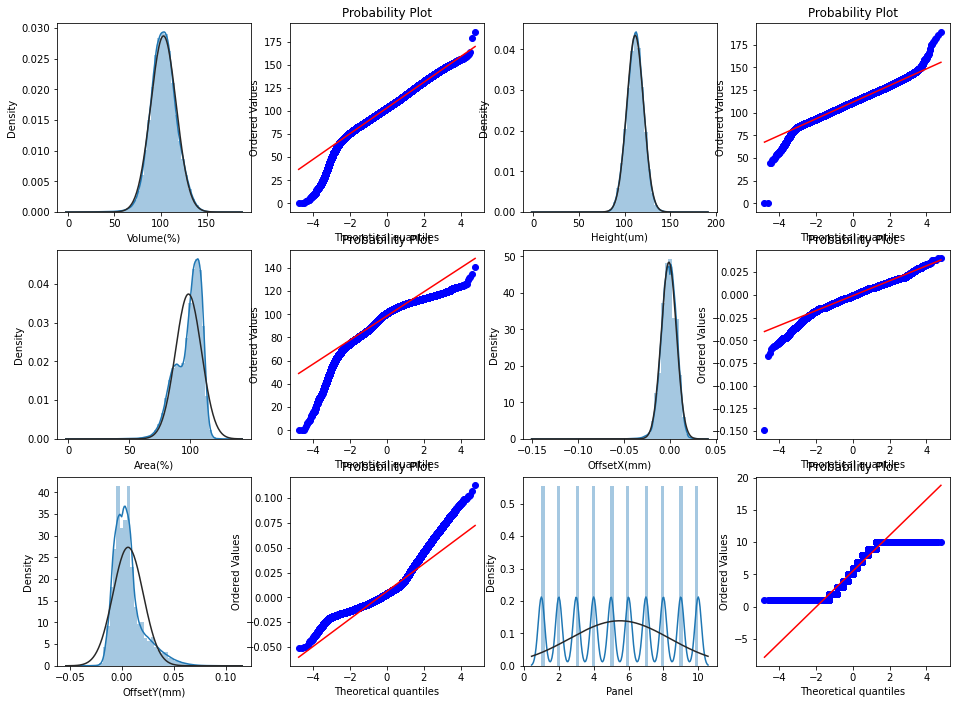

In [31]:
# PASS 样本中的样本分析情况
# 直方图与QQ图显示GOOD分布情况
cols=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)" ,"Panel"]
i=0
plt.figure(figsize=(16,16))
for col in  cols:
    i+=1
    ax=plt.subplot(4,4,i)
    sns.distplot(PASS_B_data[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(4,4,i)
    res=stats.probplot(PASS_B_data[col],plot=plt)
plt.show()

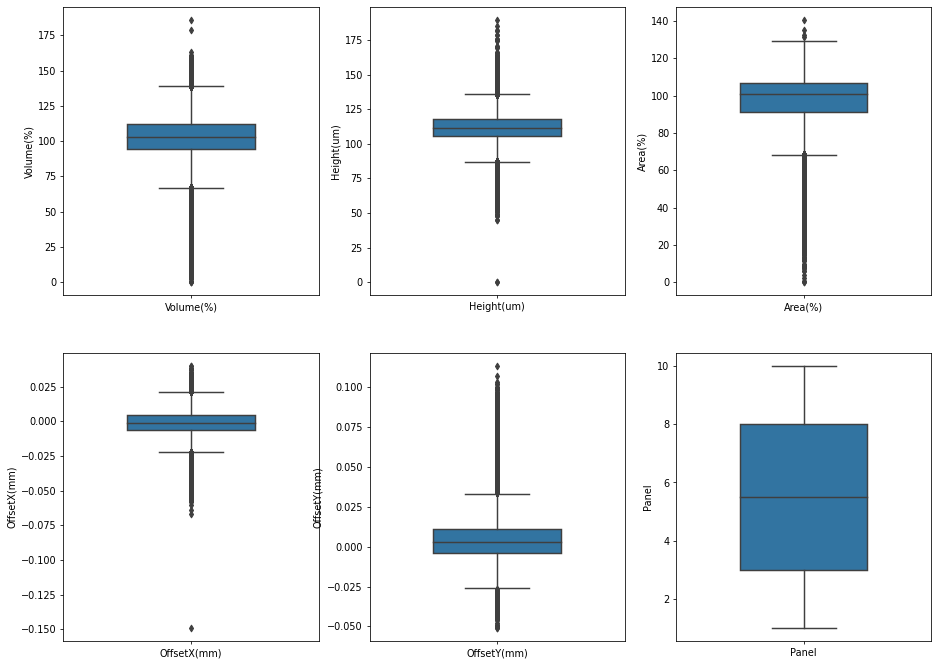

In [32]:
# 箱式图查看是否有异常值
fig=plt.figure(figsize=(16,12),dpi=70)
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=PASS_B_data[[cols[i]]],orient="v",width=0.5) 
    plt.ylabel(cols[i])
plt.show()

**查看失败各种失败的样本情况点 根据样本描述方式查看样本分析状态**

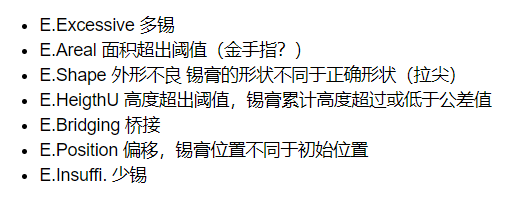

In [40]:
PASS_B_data.describe()

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Panel,CYCLE,BARCODE_INDEX
count,835560.000000,835560.000000,835560.000000,835560.000000,835560.000000,835560.000000,835560.000000,835560.000000
mean,103.200118,111.482361,98.540563,-0.001038,0.006067,5.500000,5.005051,38822.585859
std,13.894719,9.181774,10.660606,0.008242,0.014601,2.872283,0.536520,9101.668157
min,0.000000,0.000000,0.000000,-0.149000,-0.051000,1.000000,4.000000,13611.000000
25%,94.082000,105.376000,91.335000,-0.006000,-0.004000,3.000000,5.000000,37151.000000
50%,102.994000,111.609000,101.098000,-0.001000,0.003000,5.500000,5.000000,43690.000000
75%,112.083000,117.640000,106.660000,0.005000,0.011000,8.000000,5.000000,43946.000000
max,185.814000,189.338000,140.519000,0.040000,0.113000,10.000000,7.000000,44189.000000


In [41]:
# 探索多锡情况
PASS_B_data[PASS_B_data["Result"]=="E.Exessive"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
5166140,1:C43,185.814,141.231,131.568,0.024,0.029,E.Exessive,3,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43868,12:26:28,12:26:33


In [42]:
# value_counts("Component ID")
# 少锡的情况一般是Volume量比较少的
PASS_B_data[PASS_B_data["Result"]=="E.Insuffi."]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
208,1:D6,28.437,76.799,37.028,0.002,0.005,E.Insuffi.,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
264,1:D6,8.592,57.328,14.988,0.005,0.001,E.Insuffi.,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1509,1:D6,8.771,58.134,15.087,0.001,-0.005,E.Insuffi.,4,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1559,1:D6,30.613,72.544,42.199,-0.007,0.000,E.Insuffi.,4,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1564,1:D6,31.075,74.337,41.802,-0.007,-0.006,E.Insuffi.,4,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521058,1:D6,8.813,59.764,14.746,-0.013,0.004,E.Insuffi.,3,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28
6521065,1:D6,19.621,71.704,27.364,-0.014,0.009,E.Insuffi.,3,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28
6521069,1:D6,32.006,78.065,40.999,-0.015,0.003,E.Insuffi.,3,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28
6521784,1:D6,53.643,92.209,58.176,-0.009,-0.009,E.Insuffi.,5,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44189,15:34:23,15:34:28


#### 位置偏移

In [36]:
# 位移偏差情况，相比较之前，其他的XY
PASS_B_data[PASS_B_data["Result"]=="E.Position"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
1937104,1:D5,85.593,103.703,99.045,0.011,0.099,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,36872,08:14:50,08:14:55
1999996,1:D5,92.772,104.364,106.671,-0.010,0.090,E.Position,10,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,36886,08:22:56,08:23:01
2409740,1:D5,103.799,121.397,102.605,0.010,0.090,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,36984,09:15:27,09:15:32
2409741,1:D5,103.435,120.957,102.617,0.015,0.094,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,36984,09:15:27,09:15:32
2561645,1:D5,89.170,107.230,99.790,0.011,0.096,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37020,09:38:45,09:38:50
2561658,1:D5,98.853,116.416,101.896,0.007,0.090,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37020,09:38:45,09:38:50
2561659,1:D5,100.374,118.438,101.698,0.010,0.088,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37020,09:38:45,09:38:50
2561661,1:D5,99.510,118.725,100.579,-0.005,0.099,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37020,09:38:45,09:38:50
2561663,1:D5,93.245,112.151,99.771,0.001,0.093,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37020,09:38:45,09:38:50
2561664,1:D5,92.565,113.875,97.544,0.004,0.091,E.Position,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37020,09:38:45,09:38:50


In [37]:
PASS_B_data[PASS_B_data["Result"]=="E.HeightU"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
3115090,1:D6,73.055,181.911,40.160,-0.010,0.006,E.HeightU,2,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37151,10:50:39,10:50:44
3421796,1:D6,127.338,184.970,68.843,-0.003,-0.010,E.HeightU,9,2021/8/24,PASS,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,37223,11:39:44,11:39:48
3604132,1:D6,97.598,189.338,51.547,0.002,0.001,E.HeightU,1,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37268,12:03:28,12:03:33


In [38]:
# 元器件产生桥接，在同一产品中D5,元器件，同一个，产生桥接也肯定伴随着两个
PASS_B_data[PASS_B_data["Result"]=="E.Bridging"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
5488174,1:D5,100.892,103.869,116.561,0.003,-0.012,E.Bridging,6,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43944,13:16:16,13:16:21
5488175,1:D5,102.253,105.887,115.882,-0.001,-0.012,E.Bridging,6,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43944,13:16:16,13:16:21


#### 面积偏小

In [39]:
# 面积样本情况明显偏小的状态，平均值98.540563
PASS_B_data[PASS_B_data["Result"]=="E.AreaL"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
3653184,1:Q2,71.422,145.472,49.097,-0.003,0.031,E.AreaL,7,2021/8/24,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,37279,12:08:17,12:08:22


#### 外形不良

In [40]:
# shape是怎么判定的
PASS_B_data[PASS_B_data["Result"]=="E.Shape"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
5351295,1:D8,155.245,154.714,100.344,-0.013,-0.001,E.Shape,1,2021/8/27,PASS,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43912,13:00:42,13:00:47


In [41]:
155.245/100.344*100-154.714	

-0.0012119907518126638

In [42]:
PASS_B_data.value_counts("Result")

Result
GOOD          834538
E.Insuffi.       993
E.Position        21
E.HeightU          3
E.Bridging         2
E.AreaL            1
E.Exessive         1
E.Shape            1
dtype: int64

#### 查看失败样本情况

In [43]:
FAIL_B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
12660,1:C2,100.269,101.974,98.328,0.004,0.017,GOOD,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12661,1:C2,88.361,97.280,90.832,0.000,0.002,GOOD,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12662,1:C10,100.878,113.216,89.103,-0.006,0.024,GOOD,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12663,1:C10,93.411,108.816,85.843,-0.001,0.003,GOOD,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12664,1:C11,98.377,116.556,84.404,-0.010,0.010,GOOD,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15


In [44]:
FAIL_B_data.value_counts("DATE")

DATE
2021/8/27    33760
2021/8/24    16880
2021/8/10     8440
dtype: int64

In [45]:
FAIL_B_data.value_counts("Result")

Result
GOOD          58701
E.Insuffi.      373
E.Bridging        6
dtype: int64

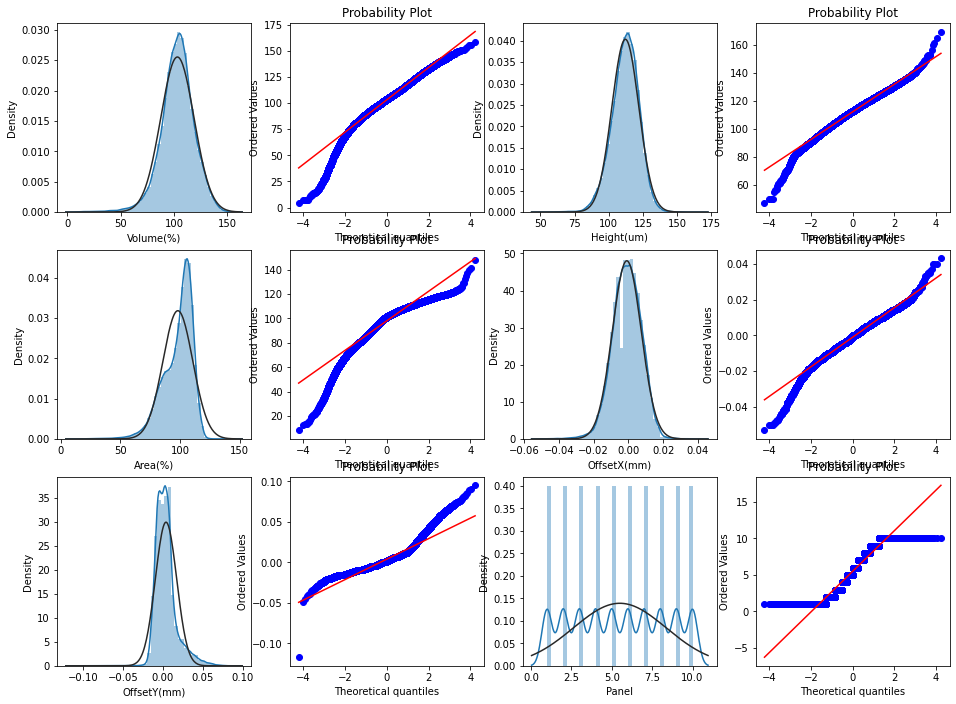

In [103]:
# 直方图与QQ图显示GOOD分布情况
cols=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)" ,"Panel"]
i=0
plt.figure(figsize=(16,16))
for col in  cols:
    i+=1
    ax=plt.subplot(4,4,i)
    sns.distplot(FAIL_B_data[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(4,4,i)
    res=stats.probplot(FAIL_B_data[col],plot=plt)
plt.show()

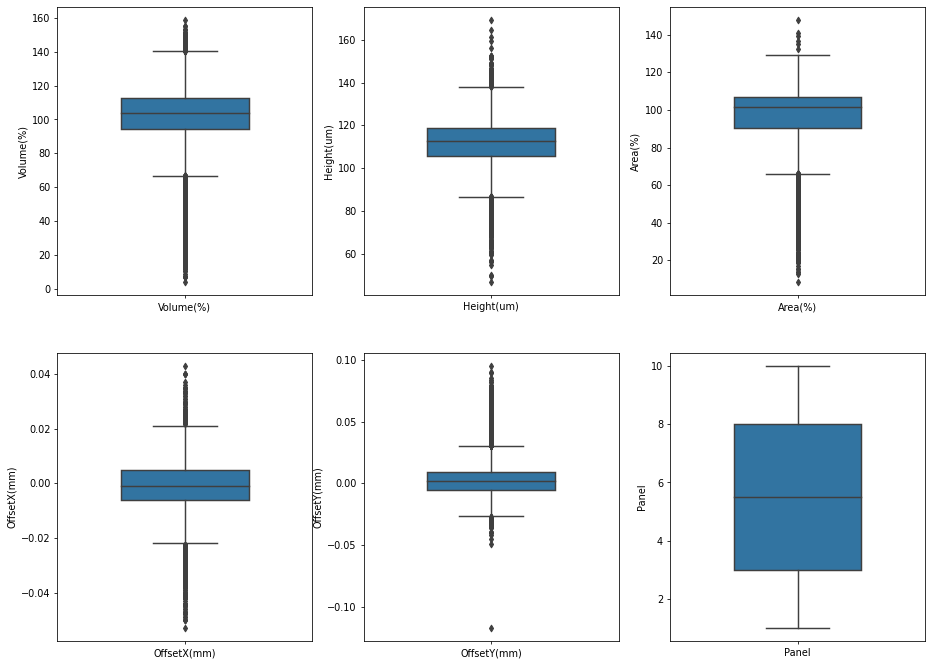

In [105]:
# 箱式图查看是否有异常值
fig=plt.figure(figsize=(16,12),dpi=70)
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=FAIL_B_data[[cols[i]]],orient="v",width=0.5) 
    plt.ylabel(cols[i])
plt.show()

In [106]:
# 少锡的情况下就是体积比较少的情况下了
FAIL_B_data[FAIL_B_data["Result"]=="E.Insuffi."]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
12793,1:D5,62.508,109.526,68.485,0.003,-0.004,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12796,1:D5,69.208,114.559,72.495,-0.009,-0.002,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12887,1:D6,33.756,97.951,34.462,0.012,0.001,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
13054,1:R40,62.339,96.462,64.626,-0.006,-0.003,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
14380,1:D5,66.554,107.564,74.249,0.000,-0.011,E.Insuffi.,5,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422683,1:D6,40.377,87.579,46.104,0.011,0.011,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25
6422693,1:D6,53.451,117.537,45.476,0.008,0.011,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25
6422699,1:D6,54.621,101.849,53.629,0.005,0.001,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25
6422739,1:D6,6.903,49.603,13.917,0.013,-0.015,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25


In [49]:
# bradging可能是一种面积坍缩的的情况，根据面积与高度确定
FAIL_B_data[FAIL_B_data["Result"]=="E.Bridging"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
4973666,1:R41,83.125,70.611,117.722,-0.003,0.004,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43822,12:02:16,12:02:21
4973667,1:R41,87.233,69.985,124.645,0.003,-0.117,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43822,12:02:16,12:02:21
5425206,1:R41,128.891,87.224,147.770,-0.009,0.095,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,43929,13:09:16,13:09:20
5425207,1:R41,94.845,69.350,136.763,-0.002,0.023,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,43929,13:09:16,13:09:20
5468413,1:D5,105.368,102.914,122.861,-0.001,0.013,E.Bridging,9,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43939,13:13:50,13:13:55
5468414,1:D5,101.002,99.579,121.715,0.003,0.061,E.Bridging,9,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43939,13:13:50,13:13:55


#### 少锡 GOOD，PASS，FAIL三个样本的情况

In [55]:
print(Good_B_data["Volume(%)"].max())
print(Good_B_data["Volume(%)"].min())

174.469
38.199


In [70]:
print(PASS_B_data[PASS_B_data["Result"] =="E.Insuffi."]["Volume(%)"].max())
print(PASS_B_data[PASS_B_data["Result"] !="GOOD"]["Volume(%)"].min())

69.885
0.0


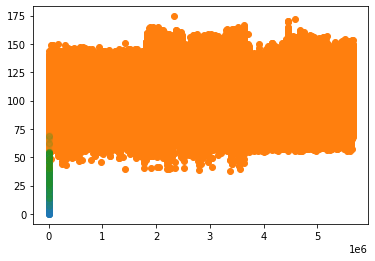

In [88]:
# PASS和good和fail少锡对比(也就是体积对比)
plt.scatter(range(len(PASS_B_data[PASS_B_data["Result"] =="E.Insuffi."]["Volume(%)"])),PASS_B_data[PASS_B_data["Result"] =="E.Insuffi."]["Volume(%)"])
plt.scatter(range(len(Good_B_data["Volume(%)"])),Good_B_data["Volume(%)"])
plt.scatter(range(len(FAIL_B_data[FAIL_B_data["Result"]=="E.Insuffi."]["Volume(%)"])),FAIL_B_data[FAIL_B_data["Result"]=="E.Insuffi."]["Volume(%)"],alpha=0.05)

In [89]:
# 104.1243362317331可能这是一个标准，少锡
Good_B_data["Volume(%)"].mean()*0.4
# 38.199

41.64973449269324

In [92]:
len(B_data[B_data["Result"]=="E.Insuffi."])/len(B_data["Result"])

0.00020829902346490025

#### 多锡分析

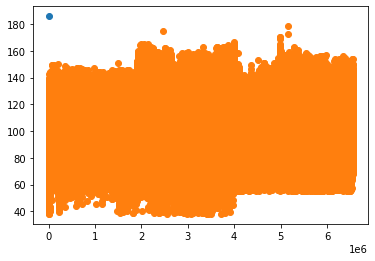

In [101]:
# PASS和good和fail少锡对比(也就是体积对比)
plt.scatter(range(len(PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"])),PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"])
plt.scatter(range(len(B_data[B_data["Result"] =="GOOD"]["Volume(%)"])),B_data[B_data["Result"] =="GOOD"]["Volume(%)"])
plt.scatter(range(len(FAIL_B_data[FAIL_B_data["Result"]=="E.Exessive"]["Volume(%)"])),FAIL_B_data[FAIL_B_data["Result"]=="E.Exessive"]["Volume(%)"],alpha=0.05)

In [94]:
PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"]

5166140    185.814
Name: Volume(%), dtype: float64

In [102]:
# 多锡膏数在 185.814 中超出标准吧0.7845395872340843
# 在其中的标准104.1243362317331上约为0.6755833104348621左右(0.71796)
(Good_B_data["Volume(%)"].max()-Good_B_data["Volume(%)"].mean())/Good_B_data["Volume(%)"].mean()

0.6755833104348621

In [105]:
(B_data[B_data["Result"] =="GOOD"]["Volume(%)"].max()-104.1243362317331)/104.1243362317331

0.717965333309694

#### 少锡分析

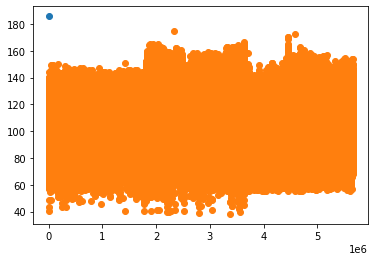

In [106]:
# PASS和good和fail少锡对比(也就是体积对比)
plt.scatter(range(len(PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"])),PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"])
plt.scatter(range(len(Good_B_data["Volume(%)"])),Good_B_data["Volume(%)"])
plt.scatter(range(len(FAIL_B_data[FAIL_B_data["Result"]=="E.Exessive"]["Volume(%)"])),FAIL_B_data[FAIL_B_data["Result"]=="E.Exessive"]["Volume(%)"],alpha=0.05)

#### 

In [14]:
# PASS和good和fail少锡对比(也就是体积对比)
plt.scatter(range(len(PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"])),PASS_B_data[PASS_B_data["Result"] =="E.Exessive"]["Volume(%)"])
plt.scatter(range(len(B_data[B_data["Result"] =="GOOD"]["Volume(%)"])),B_data[B_data["Result"] =="GOOD"]["Volume(%)"])
plt.scatter(range(len(FAIL_B_data[FAIL_B_data["Result"]=="E.Exessive"]["Volume(%)"])),FAIL_B_data[FAIL_B_data["Result"]=="E.Exessive"]["Volume(%)"],alpha=0.05)

NameError: name 'PASS_B_data' is not defined

In [21]:
FAIL_B_data[FAIL_B_data["Result"]=="E.Bridging"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
4973666,1:R41,83.125,70.611,117.722,-0.003,0.004,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43822,12:02:16,12:02:21
4973667,1:R41,87.233,69.985,124.645,0.003,-0.117,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43822,12:02:16,12:02:21
5425206,1:R41,128.891,87.224,147.770,-0.009,0.095,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,43929,13:09:16,13:09:20
5425207,1:R41,94.845,69.350,136.763,-0.002,0.023,E.Bridging,6,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,4,GT30-V2.8-00-BOT-10,43929,13:09:16,13:09:20
5468413,1:D5,105.368,102.914,122.861,-0.001,0.013,E.Bridging,9,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43939,13:13:50,13:13:55
5468414,1:D5,101.002,99.579,121.715,0.003,0.061,E.Bridging,9,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,43939,13:13:50,13:13:55


### 指出bradeging

In [77]:
FAIL_B_data[FAIL_B_data["Result"]=="E.Insuffi."]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
12793,1:D5,62.508,109.526,68.485,0.003,-0.004,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12796,1:D5,69.208,114.559,72.495,-0.009,-0.002,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
12887,1:D6,33.756,97.951,34.462,0.012,0.001,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
13054,1:R40,62.339,96.462,64.626,-0.006,-0.003,E.Insuffi.,1,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
14380,1:D5,66.554,107.564,74.249,0.000,-0.011,E.Insuffi.,5,2021/8/10,FAIL,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13614,05:51:09,05:51:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422683,1:D6,40.377,87.579,46.104,0.011,0.011,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25
6422693,1:D6,53.451,117.537,45.476,0.008,0.011,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25
6422699,1:D6,54.621,101.849,53.629,0.005,0.001,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25
6422739,1:D6,6.903,49.603,13.917,0.013,-0.015,E.Insuffi.,10,2021/8/27,FAIL,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-BOT-10,44165,15:19:20,15:19:25


In [47]:
FAIL_B_data.value_counts("Result")

Result
GOOD          58701
E.Insuffi.      373
E.Bridging        6
dtype: int64

## T产品数据集分析

In [143]:
T_data=pd.read_csv("../../dataSet/T_data_time.csv")

In [144]:
T_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,ana2,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19


In [5]:
T_data.value_counts("DATE")

DATE
2021/8/24    3787380
2021/8/27    1806350
2021/8/10    1794440
2021/8/23     909270
dtype: int64

In [6]:
T_data.value_counts("JOBRESULT")

JOBRESULT
 GOOD    6508160
 PASS    1769180
 FAIL      20100
dtype: int64

In [7]:
T_data.value_counts("ana2").index[1]

" ' NONE'"

In [145]:
# 相比较B产品T产品的有着两个工作流程
T_data.value_counts("JOB").index

Index(['GT30-V2.8-00-TOP-10', 'GT30-V2.8-00-BOT-10'], dtype='object', name='JOB')

In [147]:
T_data.drop("ana2",axis=1,inplace=True)

KeyError: "['ana2'] not found in axis"

由于T样本数据是有两个job的这里两个job是否有差异

In [20]:
T_data[T_data["JOB"]=='GT30-V2.8-00-BOT-10'].value_counts("DATE")

DATE
2021/8/23    873540
dtype: int64

In [22]:
T_data[T_data["JOB"]=='GT30-V2.8-00-BOT-10'].value_counts("Result")

Result
GOOD          873317
E.Insuffi.       219
E.Position         3
E.AreaL            1
dtype: int64

对此我们发现少锡还是占大多数的，其中数据有点问题BOT是多的，这里只有一天的参数数据  
可能是数据原因的问题，所以删除掉，以便于分析数据

In [148]:
T_data=T_data[T_data["JOB"]!='GT30-V2.8-00-BOT-10']

In [149]:
T_data.shape

(7423900, 19)

In [150]:
T_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [27]:
# 2,077这是文件总的数据量
T_data["BARCODE_INDEX"].nunique()

1870

In [28]:
T_data["JOBRESULT"]==

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [171]:
## good与pass与fail样本区别
Good_T_data=T_data[T_data["JOBRESULT"]==" GOOD"]
PASS_T_data=T_data[T_data["JOBRESULT"]==" PASS"]
FAIL_T_data=T_data[T_data["JOBRESULT"]==" FAIL"]

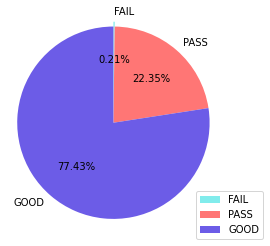

In [29]:
#  
index=["FAIL","PASS","GOOD"]
sample_jobresult=[len(FAIL_T_data.value_counts("BARCODE_INDEX")),len(PASS_T_data.value_counts("BARCODE_INDEX")),len(Good_T_data.value_counts("BARCODE_INDEX"))]
colors = ['#81ecec','#ff7675','#6c5ce7']
plt.pie(sample_jobresult,labels = index, explode = (0.05, 0, 0),autopct="%1.2f%%", colors = colors, startangle = 90, counterclock = False )
plt.axis('square')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.2))
plt.show()

In [31]:
T_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19


In [33]:
Good_T_data.value_counts("Result")

Result
GOOD    5748560
dtype: int64

<AxesSubplot:ylabel='None'>

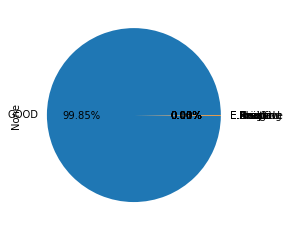

In [42]:
PASS_T_data.value_counts("Result").plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:ylabel='None'>

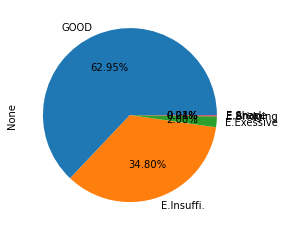

In [38]:
FAIL_T_data.value_counts("Result").plot(kind="pie",autopct="%1.2f%%")

In [45]:
FAIL_T_data.value_counts("Result")

Result
GOOD          9996
E.Insuffi.    5527
E.Exessive     317
E.Bridging      33
E.AreaL          6
E.Shape          1
dtype: int64

In [48]:
T_data[T_data["Result"]=='E.Insuffi.'].value_counts("Component ID")

Component ID
1:D12    1261
1:X1      701
1:D3      584
1:D1      495
1:D7      473
         ... 
1:C29      22
1:C30      22
1:R38      22
1:R37      22
1:R23      22
Length: 112, dtype: int64